<a href="https://colab.research.google.com/github/zengxuhe/pyGAD-kerastuner/blob/main/group4_(21)_included.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/keras-team/keras-tuner

Cloning into 'keras-tuner'...
remote: Enumerating objects: 7099, done.
remote: Counting objects: 100% (457/457), done.
remote: Compressing objects: 100% (205/205), done.
remote: Total 7099 (delta 252), reused 397 (delta 231), pack-reused 6642
Receiving objects: 100% (7099/7099), 1.53 MiB | 14.46 MiB/s, done.
Resolving deltas: 100% (4957/4957), done.


In [ ]:
cd keras-tuner

[Errno 2] No such file or directory: 'keras-tuner'
/content/keras-tuner


In [ ]:
!pip install .

Processing /content/keras-tuner
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-tuner: filename=keras_tuner-1.0.3-py3-none-any.whl size=97186 sha256=4d1688be5758ac715e75a17bc0cc3762f1507b4b77c7bdcda973d39165bd1c79
  Stored in directory: /root/.cache/pip/wheels/7a/f4/56/f120140a3c0706aebedf4471bfee8f02bbce4755424e32e245
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-py3-none-any.whl size=9568 sha256=0dec5c1b68cd803c0f53a2716ebe653e267d526d2352754ea1a13d17ff742878
  Stored in directory: /root/.cache/pip/wheels/38/5c/e0/13003e68c17f403af40b92a24d20171b95fef13b0fdaba833c
Successfully built keras-tuner kt-legacy


Trial 5 Complete [00h 00m 05s]
val_mean_absolute_error: 0.49087435007095337

Best val_mean_absolute_error So Far: 0.28988781571388245
Total elapsed time: 00h 00m 33s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir/255245112154156315312654245298
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
drop_rate: 0.1
activation: relu
num_layers: 4
units_0: 46
units_1: 34
optimizer: adam
units_2: 28
units_3: 33
Score: 0.28988781571388245
Trial summary
Hyperparameters:
drop_rate: 0.0
activation: relu
num_layers: 2
units_0: 40
units_1: 26
optimizer: adam
units_2: 37
units_3: 46
Score: 0.3273644646008809
Trial summary
Hyperparameters:
drop_rate: 0.0
activation: tanh
num_layers: 4
units_0: 33
units_1: 21
optimizer: adam
units_2: 5
units_3: 5
Score: 0.37996700406074524
Trial summary
Hyperparameters:
drop_rate: 0.1
activation: tanh
num_layers: 3
units_0: 30
units_1: 24
optimizer: sgd
units_2: 15
units_3: 47
Score: 0

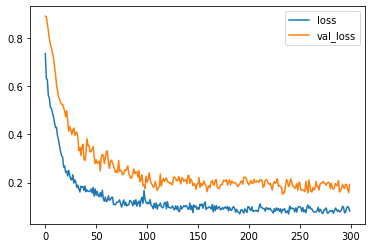

tf.Tensor([[-5.6445756]], shape=(1, 1), dtype=float32)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 46)                276       
_________________________________________________________________
dense_1 (Dense)              (None, 34)                1598      
_________________________________________________________________
dense_2 (Dense)              (None, 28)                980       
_________________________________________________________________
dense_3 (Dense)              (None, 33)                957       
_________________________________________________________________
dropout (Dropout)            (None, 33)                0         
_________________________________________________________________
d

{'activation': 'relu',
 'drop_rate': 0.1,
 'num_layers': 4,
 'optimizer': 'adam',
 'units_0': 46,
 'units_1': 34,
 'units_2': 28,
 'units_3': 33}

In [ ]:
# Train a DNN model for prediction

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kerastuner as kt

# upload the data base at the certain path
data = pd.read_csv('/content/traincmp.csv')


x = data.loc[0:119, ['A','B','C','D','E']]
x =np.array(x)
x_mean = np.mean(x,axis=0)
x_std = np.std(x,axis=0)
x = (x-x_mean)/x_std
x_test = x[110:119,:]
x = x [0:110,:]


y = data.loc[0:119, ['target']]
y=np.array(y)
y_target= y[110:119,:]
y_mean = np.mean(y,axis=0)
y_std = np.std(y,axis=0)
y = (y-y_mean)/y_std
y = y [0:110,:]



np.random.seed(3)
np.random.shuffle(x)
np.random.seed(3)
np.random.shuffle(y)

x_train = x[0:100,:]
x_val = x[100:110,:]
y_train = y[0:100,:]
y_val = y[100:110,:]


#Define model
def model_builder(hp):
  model = keras.Sequential()
#Set the input layer
  model.add(keras.layers.Flatten(input_shape=(5,1)))
#Set dropout rate search space
  drop_rate = hp.Choice('drop_rate', 
                            [0.0, 0.1, 0.2, 0.3, 0.4,])
#Set activation function search space
  activation = hp.Choice('activation', 
                            ['relu', 'tanh', 'sigmoid'])
#In here, we tuner the number of layers using for loop
  for i in range(hp.Int('num_layers', 2 , 5)):
    model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                      min_value=5,
                      max_value=50,
                      step=1),
                activation= activation))
  model.add(keras.layers.Dropout(rate=drop_rate))
  model.add(keras.layers.Dense(1, activation='linear'))
#  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
  model.compile(
          optimizer= optimizer,
          loss='mean_absolute_error',
          metrics=['mean_absolute_error'])

#          optimizer=tf.keras.optimizers.optimizer(lr=hp_learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08),

  return model
tuner = kt.RandomSearch(model_builder,
                     objective='val_mean_absolute_error',
                     max_trials=5,
                     executions_per_trial=3,
                     directory='my_dir',
                     project_name='255245112154156315312654245298')
# represent the search space
tuner.search_space_summary()

# search the best hyperparameters
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(x_train,y_train,epochs=50,validation_split=0.2,callbacks=[stop_early])

# recall the overall hyperparameters
tuner.results_summary()

# train model with the best hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)


history=model.fit(x_train, y_train, batch_size=16, epochs=300, validation_data=(x_val,y_val), validation_freq=1, shuffle=False)


# plot the figure illustrating the training loss and validation loss
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
x = np.array([10,10,65,50,5])
x=x.reshape(1,5)
y=model(x)
print(y)
#manifest the model structure
model.summary()

#extract the best hyperparameters 
tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
7/7 [==============================] - 1s 26ms/step - loss: 0.7842 - mae: 0.7842 - val_loss: 0.9316 - val_mae: 0.9316
Epoch 2/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6944 - mae: 0.6944 - val_loss: 0.8698 - val_mae: 0.8698
Epoch 3/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6084 - mae: 0.6084 - val_loss: 0.7960 - val_mae: 0.7960
Epoch 4/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5485 - mae: 0.5485 - val_loss: 0.7657 - val_mae: 0.7657
Epoch 5/300
7/7 [==============================] - 0s 8ms/step - loss: 0.5091 - mae: 0.5091 - val_loss: 0.7319 - val_mae: 0.7319
Epoch 6/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4615 - mae: 0.4615 - val_loss: 0.6972 - val_mae: 0.6972
Epoch 7/300
7/7 [==============================] - 0s 7ms/step - loss: 0.4252 - mae: 0.4252 - val_loss: 0.6753 - val_mae: 0.6753
Epoch 8/300
7/7 [==============================] - 0s 7ms/step - loss: 0.4134 - mae: 0.4134 - va

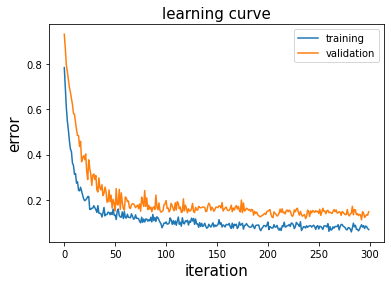

tf.Tensor(
[[2.8446436 ]
 [0.77855563]
 [0.7050824 ]
 [0.58367705]
 [0.07188159]
 [0.4337213 ]
 [0.34739375]
 [0.13659263]
 [0.11441684]], shape=(9, 1), dtype=float32)
tf.Tensor(
[[0.17363387]
 [0.21042044]
 [0.145859  ]
 [0.12785916]
 [0.11196509]
 [0.16016297]
 [0.2086449 ]
 [0.04559166]
 [0.03972807]], shape=(9, 1), dtype=float32)


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# upload the data base at the certain path
data = pd.read_csv('/content/traincmp.csv')


x = data.loc[0:119, ['A','B','C','D','E']]
x =np.array(x)
x_mean = np.mean(x,axis=0)
x_std = np.std(x,axis=0)
x = (x-x_mean)/x_std
x_test = x[110:119,:]
x = x [0:110,:]


y = data.loc[0:119, ['target']]
y=np.array(y)
y_target= y[110:119,:]
y_mean = np.mean(y,axis=0)
y_std = np.std(y,axis=0)
y = (y-y_mean)/y_std
y = y [0:110,:]



np.random.seed(3)
np.random.shuffle(x)
np.random.seed(3)
np.random.shuffle(y)

x_train = x[0:100,:]
x_val = x[100:110,:]
y_train = y[0:100,:]
y_val = y[100:110,:]


model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(5,1)),
        tf.keras.layers.Dense(46, activation=tf.nn.relu),
        tf.keras.layers.Dense(34, activation=tf.nn.relu),
        tf.keras.layers.Dense(28, activation=tf.nn.relu),
        tf.keras.layers.Dense(33, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1, activation='linear')
])
#SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
#RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)
#Adagrad(lr=0.01, epsilon=1e-06)
#Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
          loss='mae',
          metrics=['mae'])

history=model.fit(x_train, y_train, batch_size=16, epochs=300, validation_data=(x_val,y_val), validation_freq=1, shuffle=False)
#history=model.fit(x_train, y_train, batch_size=16, epochs=200, validation_split=0.2, validation_freq=1,shuffle=False)

model.summary()



epochs = len(history.history['loss'])
plt.plot(np.arange(len(history.history['loss'])),history.history['loss'],label='training')
plt.plot(np.arange(len(history.history['val_loss'])),history.history['val_loss'],label='validation')
plt.legend(fontsize=10)
plt.title('learning curve',fontsize=15)
plt.xlabel('iteration',fontsize=15)
plt.ylabel('error',fontsize=15)
plt.show()
y_test=model(x_test)
y_mid= tf.multiply(y_test,y_std)
y_test= tf.add(y_mid, y_mean)
error= tf.abs(tf.subtract(y_test, y_target))
error_percentage = tf.divide(error, y_target)
print(error)
print(error_percentage)

In [ ]:
!pip3 install pygad

     |████████████████████████████████| 52 kB 1.3 MB/s 


/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:731: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.")


Generation = 1
Fitness    = [3.5453439]
Change     = [3.5453439]
Generation = 2
Fitness    = [3.5453439]
Change     = [0.]
Generation = 3
Fitness    = [3.8000395]
Change     = [0.25469565]
Generation = 4
Fitness    = [3.8000395]
Change     = [0.]
Generation = 5
Fitness    = [3.8000395]
Change     = [0.]
Generation = 6
Fitness    = [3.8000395]
Change     = [0.]
Generation = 7
Fitness    = [3.8000395]
Change     = [0.]
Generation = 8
Fitness    = [4.6114526]
Change     = [0.81141305]
Generation = 9
Fitness    = [4.6114526]
Change     = [0.]
Generation = 10
Fitness    = [4.6114526]
Change     = [0.]
Generation = 11
Fitness    = [4.6114526]
Change     = [0.]
Generation = 12
Fitness    = [4.6114526]
Change     = [0.]
Generation = 13
Fitness    = [4.6114526]
Change     = [0.]
Generation = 14
Fitness    = [4.6114526]
Change     = [0.]
Generation = 15
Fitness    = [4.6114526]
Change     = [0.]
Generation = 16
Fitness    = [4.6114526]
Change     = [0.]
Generation = 17
Fitness    = [4.6114526]
C

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:3105: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


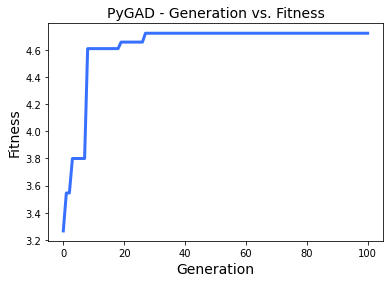

Parameters of the best solution : [11.0507051   8.02409459 79.27108874 68.23396995  4.64843663]
Fitness value of the best solution = [0.21164127]


In [ ]:
# Optimization for input features

import numpy as np
import pygad

#initialization
function_inputs = [0.5,0.5,0.5,0.5,0.5]

#define fitness function
def fitness_func(solution, solution_idx):
    target = [1.5]
    target = abs(y-y_mean)/y_std
    output=model(np.array(solution*function_inputs).reshape(1,5)) # model is built in keras.tuner
    output = abs(tf.subtract(abs(output), abs(target)))
    fitness =((1/output)).numpy()[0]
    #fitness =output.numpy()[0]
    return fitness

# Number of generations.
num_generations = 100
# Number of solutions to be selected as parents in the mating pool.
num_parents_mating = 5 
# Number of solutions in the population.
sol_per_pop = 10 
  
# Type of parent selection.
parent_selection_type = "sss"
# Type of the crossover operator.
crossover_type = "single_point" 
# Type of the mutation operator.
mutation_type = "random"

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(
     #Number of generations(iterations).
     num_generations=num_generations,
     num_parents_mating=num_parents_mating,
     fitness_func=fitness_func,
     sol_per_pop=sol_per_pop,
     #the Number of parameters(the number of genes)
     num_genes=5,
     gene_space=[np.arange(-1.68,2.88,0.01).tolist(),np.arange(-1.34,1.73,0.01).tolist(),np.arange(-0.88,1.56,0.01).tolist(),np.arange(-0.99,1.32,0.01).tolist(),
                 np.arange(-1.26,-0.392,0.01).tolist()],
     
     parent_selection_type=parent_selection_type,
     keep_parents=1,
     crossover_type=crossover_type,
     mutation_percent_genes=50,
     mutation_type=mutation_type,
     callback_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()


# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
solution = tf.multiply(solution,x_std)
solution = tf.add(solution, x_mean)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=1/solution_fitness))

In [ ]:
save_path = r'E:\model\group10.h5'
model.save(save_path)

In [ ]:
print(y_test)

tf.Tensor(
[[13.538356 ]
 [ 2.9214444]
 [ 4.1289177]
 [ 3.981323 ]
 [ 0.5701184]
 [ 2.2742786]
 [ 1.3176062]
 [ 2.8594074]
 [ 2.994417 ]], shape=(9, 1), dtype=float32)
